# Random Forest Regression
This program runs random forest regression to attempt to predict stock prices after the next three months.

### 1. Imports

In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
sns.set()

### 2. Load the data

In [55]:
data = pd.read_csv('../datasets/stocks_data.csv')
data.describe(include='all')

,Unnamed: 0,Ticker,Year,Month,MA Ratio,Result,ROE,Insider Ownership Growth,Institutional Ownership Growth,Forecast EPS Growth,Avg 2Q EPS Growth,Avg 2Q EPS Surprise,YoY EPS Growth,Sector Performance,Market Performance
count,14854.000000,14854,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000,14854.000000
unique,NaN,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AWK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7426.500000,NaN,2020.669113,6.223240,1.004148,1.032817,39.494365,0.015486,0.026708,0.057775,0.181477,13.755183,0.369529,1.488003,1.438443
std,4288.124784,NaN,1.428016,3.520757,0.046473,0.149260,181.839873,0.269863,0.230675,2.136724,2.111809,46.751483,3.637998,8.164589,7.038394
min,0.000000,NaN,2018.000000,1.000000,0.580721,0.259712,-613.743387,-0.633527,-0.714136,-0.992366,-45.050000,-65.625000,-0.961538,-44.900728,-22.795349
25%,3713.250000,NaN,2019.000000,3.000000,0.977766,0.944153,10.160854,-0.001350,-0.023114,-0.184264,-0.040838,2.015000,0.017606,-3.453784,-3.160007
50%,7426.500000,NaN,2021.000000,6.000000,1.005360,1.028547,19.251991,0.000000,-0.000648,-0.039062,0.045662,6.055000,0.130688,1.496227,2.069271
75%,11139.750000,NaN,2022.000000,9.000000,1.031953,1.113949,31.949569,0.008000,0.033653,0.086957,0.154182,13.135000,0.275148,6.429508,5.507430


### 3. Clean the data
Let's drop unnecessary columns

In [56]:
data_cleaned = data.drop(['Ticker', 'Year', 'Month', data.columns[0]], axis=1)
data_cleaned = data_cleaned.reset_index(drop=True)
data_cleaned

,MA Ratio,Result,ROE,Insider Ownership Growth,Institutional Ownership Growth,Forecast EPS Growth,Avg 2Q EPS Growth,Avg 2Q EPS Surprise,YoY EPS Growth,Sector Performance,Market Performance
0,0.961995,1.223647,6.913148,0.100796,-0.004951,-0.098765,0.119862,8.440,0.177215,-3.656652,-8.854201
1,1.066554,1.034318,6.913148,0.095491,0.023857,-0.098765,0.119862,8.440,0.177215,-4.861458,-3.160007
2,1.046990,0.826977,6.913148,-0.012048,0.025465,-0.052632,0.073613,7.045,0.156000,7.205480,12.969931
3,1.020680,0.915522,22.637014,0.000000,0.117718,-0.052632,0.073613,7.045,0.156000,1.791749,5.414237
4,0.983734,0.897937,22.637014,0.007317,0.121825,-0.052632,0.073613,7.045,0.156000,-2.805357,5.507430
...,...,...,...,...,...,...,...,...,...,...,...
14849,0.988689,1.136043,44.337194,0.015625,0.004154,-0.132231,-0.041288,-1.785,0.026030,2.515130,-1.243019
14850,1.050920,1.049746,44.337194,0.000000,-0.128752,-0.132231,-0.041288,-1.785,0.026030,-4.031062,-0.417651
14851,1.001497,0.974880,48.012719,0.046154,-0.187616,0.095652,-0.020627,3.915,0.038298,-6.645055,2.856001
14852,1.016859,1.029403,48.012719,0.046154,-0.080948,0.095652,-0.020627,3.915,0.038298,-2.748756,0.789421


## First attempt

### 4. Train the model

#### 4.1. Define targets and inputs

In [57]:
targets = data_cleaned['Result']
inputs = data_cleaned.drop(['Result'], axis=1)

#### 4.2. Split the data for training and test

In [58]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

#### 4.3. Train the model

In [59]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

### 5. Evaluation

#### 5.1. MSE & R-square

In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.015183464138976201
R2 Score: 0.30982011362455597


#### 5.2. Features importance

In [61]:
feature_importance = rf_model.feature_importances_
for feature, importance in zip(inputs.columns, feature_importance):
    print(f"{feature}: {importance}")

MA Ratio: 0.10444982867149477
ROE: 0.07934873405954859
Insider Ownership Growth: 0.06421396780608997
Institutional Ownership Growth: 0.09150590653635102
Forecast EPS Growth: 0.07624718957328665
Avg 2Q EPS Growth: 0.07975751393261649
Avg 2Q EPS Surprise: 0.07654409137903417
YoY EPS Growth: 0.11702318291560258
Sector Performance: 0.08981618340307074
Market Performance: 0.22109340172290504


#### 5.3. Model accuracy visualisation

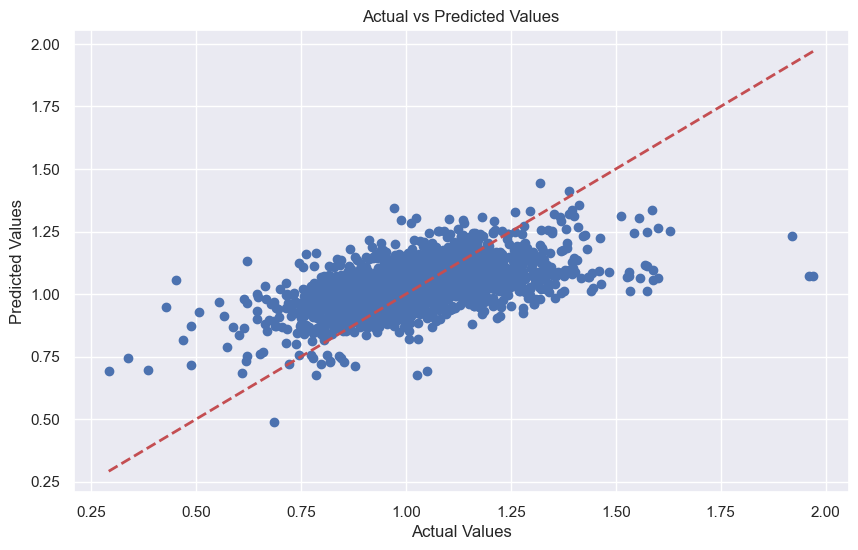

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_model.predict(x_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### 6. Conclusion
The random forest regression model produced the following results:
- Mean Squared Error (MSE): 0.0152
- R² Score: 0.3098

These metrics indicate that the model performs better than the linear regression model, as evidenced by a higher R² score. R² score higher than 0.3 in stock prices prediction is considered high. Unfortunately, I suspect that there has been overfitting to the 'Market Performance' variable.

##### Concerns about Overfitting
The high importance of the Market Performance features raises concerns about potential overfitting. Specifically, the model might have learned to exploit short-term patterns, such as the market crash during March 2020 due to the COVID-19 pandemic, where the market dropped by over 20% but quickly rebounded. Given that the dataset spans from 2018 to 2023, this was the only two-month period where the S&P 500 experienced such a significant drop. The model may have learned that when the Market Performance metric is below -20%, stock prices are likely to increase sharply afterward.

#### Addressing Overfitting
To address this potential overfitting, I think the best approach is to split the data for training and testing based on time rather than randomly. For instance, using data after 2022 exclusively for testing could help ensure the model's generalizability over time. By implementing this, the model's performance can be better evaluated for its robustness and its ability to generalize beyond the specific market conditions observed during the training period.

## Second attempt
In this attempt, I will rerun the random forest regression, but this time I will split the data into training and testing sets based on time rather than randomly. If the R-squared value remains high, it will confirm that the model performs well across different time periods and that overfitting has not occurred.

### 4. Preprocess the data

#### 4.1. Split the data for training and test

In [63]:
data_copy = data.reset_index(drop=True)
train_data = data_copy[data_copy['Year'] < 2023]
test_data = data_copy[data_copy['Year'] >= 2023]

#### 4.2. Clean the data

In [64]:
x_training = train_data.drop(['Year', 'Result', 'Month', 'Ticker', data.columns[0]], axis=1)
y_training = train_data['Result']
x_testing = test_data.drop(['Year', 'Result', 'Month', 'Ticker', data.columns[0]], axis=1)
y_testing = test_data['Result']

### 5. Train the model

In [65]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(x_training, y_training)
y_pred = rf_model.predict(x_testing)

### 6. Evaluation

In [66]:
mse = mean_squared_error(y_testing, y_pred)
r2 = r2_score(y_testing, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 0.029590599373628797
R2 Score: -0.320048150395011


### 7. Conclusion
In this attempt to train the random forest model, where the data was split based on time rather than randomly, the results were as follows:
- Mean Squared Error (MSE): 0.0296
- R² Score: -0.32

The negative R² score indicates that the model is performing worse than a simple mean prediction, suggesting that it struggles to generalize across different time periods.

The poor performance of the model likely stems from the limited time span of the dataset, which only covers one recession (in 2022). This single recessionary period does not provide sufficient variability for the model to learn patterns that generalize well over time. As a result, the model may be overfitting to the specific conditions of that period rather than capturing broader trends.

To improve the model's performance, it might be necessary to extend the dataset to cover a longer time frame that includes multiple economic cycles. This would provide the model with more diverse data, allowing it to learn patterns that are more representative of various market conditions.